In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/migration-nz/migration_nz.csv


In [2]:
# Installations
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 54.1 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=befa5548545f33cc82d092c2277e3cb0c53b88af21c41f26d7aa309766f89a85
  Stored in directory: /root/.cache/pip/wheels/e9/43/d9/de0427ef97aeac94f853545b02a8c07661abe1f44b64a0266d
Successfully built pycountry


### Imports

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tbl
import geopandas as gp
import pycountry as pyc
from collections import Counter

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
# Data set
data = pd.read_csv("/kaggle/input/migration-nz/migration_nz.csv", header = 0)

# View
data.head(1)

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0


In [5]:
# Color palette
palette = sns.color_palette("icefire", as_cmap=True)

# Expand the color palette above

# Special palette for denoting loss values
loss_colors = [sns.color_palette('flare')[1], sns.color_palette('viridis')[4]]

# Data Exploration

Data set contents:
- 5 columns
- 86,526 records

In [6]:
# Size
print(f'There are {data.shape[0]} rows across {data.shape[1]} columns.')

There are 86526 rows across 5 columns.


In [7]:
# Checking dtype and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86526 entries, 0 to 86525
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      86526 non-null  object 
 1   Country      86526 non-null  object 
 2   Citizenship  86526 non-null  object 
 3   Year         86526 non-null  int64  
 4   Value        86454 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [8]:
# For each object dtype, return the unique values
for cols in data.columns:
    if data[cols].dtype == 'object' or data[cols].dtype == 'int64':
        print(f'{cols}: {data[cols].nunique()}')

Measure: 3
Country: 253
Citizenship: 3
Year: 38


In [9]:
# Unique Values - Measure
print(f'Measure unique values:\n{data.Measure.value_counts()}')

Measure unique values:
Arrivals      28842
Departures    28842
Net           28842
Name: Measure, dtype: int64


In [10]:
# Unique Values - Year
print(f'Year unique values:\n{data.Year.value_counts()}')

Year unique values:
1979    2277
2007    2277
2000    2277
2001    2277
2002    2277
2003    2277
2004    2277
2005    2277
2006    2277
2008    2277
1980    2277
2009    2277
2010    2277
2011    2277
2012    2277
2013    2277
2014    2277
2016    2277
1999    2277
1998    2277
1997    2277
1996    2277
1981    2277
1982    2277
1983    2277
1984    2277
1985    2277
1986    2277
1987    2277
1988    2277
1989    2277
1990    2277
1991    2277
1994    2277
1992    2277
1993    2277
1995    2277
2015    2277
Name: Year, dtype: int64


In [11]:
# Unique Values - Country
print(f'Country unique values:\n{data.Country.value_counts()}')

Country unique values:
Oceania              342
US Virgin Islands    342
Puerto Rico          342
Paraguay             342
Suriname             342
                    ... 
Greece               342
Croatia              342
Hungary              342
Ireland              342
All countries        342
Name: Country, Length: 253, dtype: int64


In [12]:
# Summary of Value
data.Value.describe()

count     86454.000000
mean        254.669304
std        3123.604622
min      -42627.000000
25%           0.000000
50%           0.000000
75%           6.000000
max      127305.000000
Name: Value, dtype: float64

## Visualizations

Visualizations will be most effective when looking at the intersections of categorical variables. Example: Arrivals by year.

### Measure across Years
Within Measure, there are three categories:
- Arrivals, for individuals arriving to New Zealand.
- Departures, for individuals leaving New Zealand.
- Net, the difference between arrivals and departures.

There is an interesting question to ask about the Net migration per year in the timeframe of 1979 thru 2016.

In [13]:
# Filtered dataset
new_data = data[(data['Citizenship'] == 'Total All Citizenships') & (data['Country'] != 'All countries')]

# Reset the index
new_data.reset_index(inplace = True)
# Check
new_data.head(10)

,index,Measure,Country,Citizenship,Year,Value
0,2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
1,5,Arrivals,Antarctica,Total All Citizenships,1979,13.0
2,8,Arrivals,American Samoa,Total All Citizenships,1979,30.0
3,11,Arrivals,Australia,Total All Citizenships,1979,13037.0
4,14,Arrivals,Cocos Islands,Total All Citizenships,1979,0.0
5,17,Arrivals,Cook Islands,Total All Citizenships,1979,807.0
6,20,Arrivals,Christmas Island,Total All Citizenships,1979,0.0
7,23,Arrivals,Fiji,Total All Citizenships,1979,680.0
8,26,Arrivals,Micronesia,Total All Citizenships,1979,4.0
9,29,Arrivals,Guam,Total All Citizenships,1979,1.0


In [14]:
# Years
years = [*new_data.Year.unique()]
years = sorted(years, reverse = False) # Do this step to ensure years are correctly sorted in ascending order

# Measures
measures = [*new_data.Measure.unique()]

In [15]:
# Function to calculate measure sum based on year
def measurePerYear(measure, year) -> int:
    """
        measure is "Arrivals", "Departures", or "Net"
        year in any int64 from 1979 thru 2016 that appears in years
        
    """
    # Return
    return int(new_data['Value'].loc[(new_data['Measure']==measure) & (new_data['Year']==year)].sum())

When calculating arrivals, departures, and net migrations, do not use the all locations rows. Also, focus only on the Total All Citizenships rows.

In [16]:
### Measures per year
# Lists
arrivals_per_year = []
departures_per_year = []
net_per_year = []

# Iterate to calculate
for y in years:
    arrivals_per_year.append(measurePerYear('Arrivals', y))
    departures_per_year.append(measurePerYear('Departures', y))
    net_per_year.append(measurePerYear('Net', y))

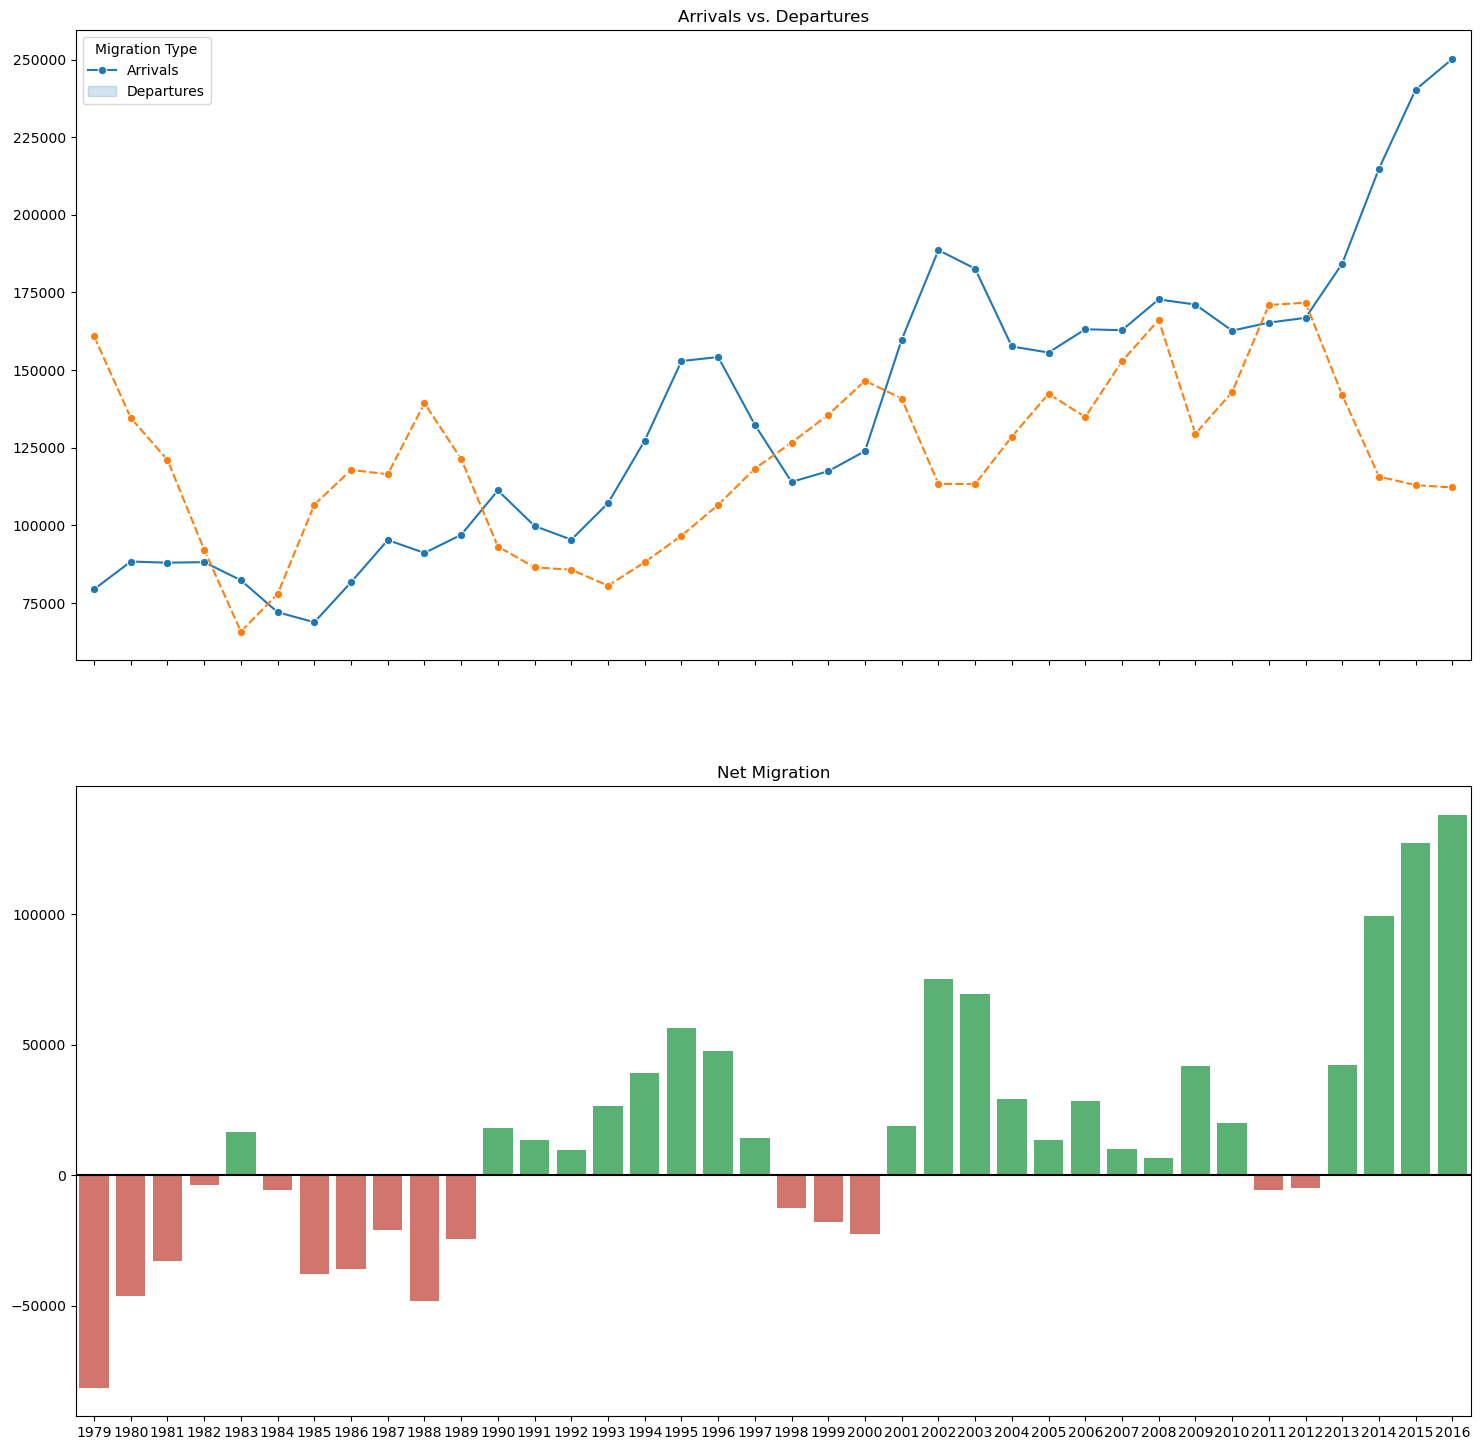

In [17]:
### Arrivals vs. Departures vs. Net
# Make subplots
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize = (18,18), sharex = True)

# Plots
sns.lineplot(data = [arrivals_per_year, departures_per_year],
             marker = "o",
             linestyle = 'dashed',
             ax = ax0)

# Set the line chart title
ax0.set_title('Arrivals vs. Departures')
# Fix the legend
ax0.legend(title = "Migration Type", labels = ['Arrivals', 'Departures'])

# Centered barplot
sns.barplot(x=years, y=net_per_year, palette=[loss_colors[0] if y < 0 else loss_colors[1] for y in net_per_year], ax=ax1)
# Center the axis
ax1.axhline(0, color = "black")
# Set the title for the barplot
ax1.set_title("Net Migration")

# View
fig.show()

In [18]:
### Create a table for plain language
# Compile necessary columsn into a dataframe
yearly_migration_summary = pd.DataFrame(list(zip(years, arrivals_per_year, departures_per_year, net_per_year)), columns = ["year", "arrivals_tot", "departures_tot", "net_tot"])

# Table
print(tbl.tabulate(yearly_migration_summary,
                    headers=["Years", "Total Arrivals", "Total Departures", "Total Net"],
                    tablefmt="prettytable"))

      Years    Total Arrivals    Total Departures    Total Net
--  -------  ----------------  ------------------  -----------
 0     1979             79407              160857       -81450
 1     1980             88335              134584       -46249
 2     1981             87971              121038       -33067
 3     1982             88141               92136        -3995
 4     1983             82312               65765        16547
 5     1984             72011               77886        -5875
 6     1985             68789              106637       -37848
 7     1986             81669              117846       -36177
 8     1987             95267              116442       -21175
 9     1988             91107              139309       -48202
10     1989             96945              121359       -24414
11     1990            111229               93157        18072
12     1991             99772               86465        13307
13     1992             95383               85712      

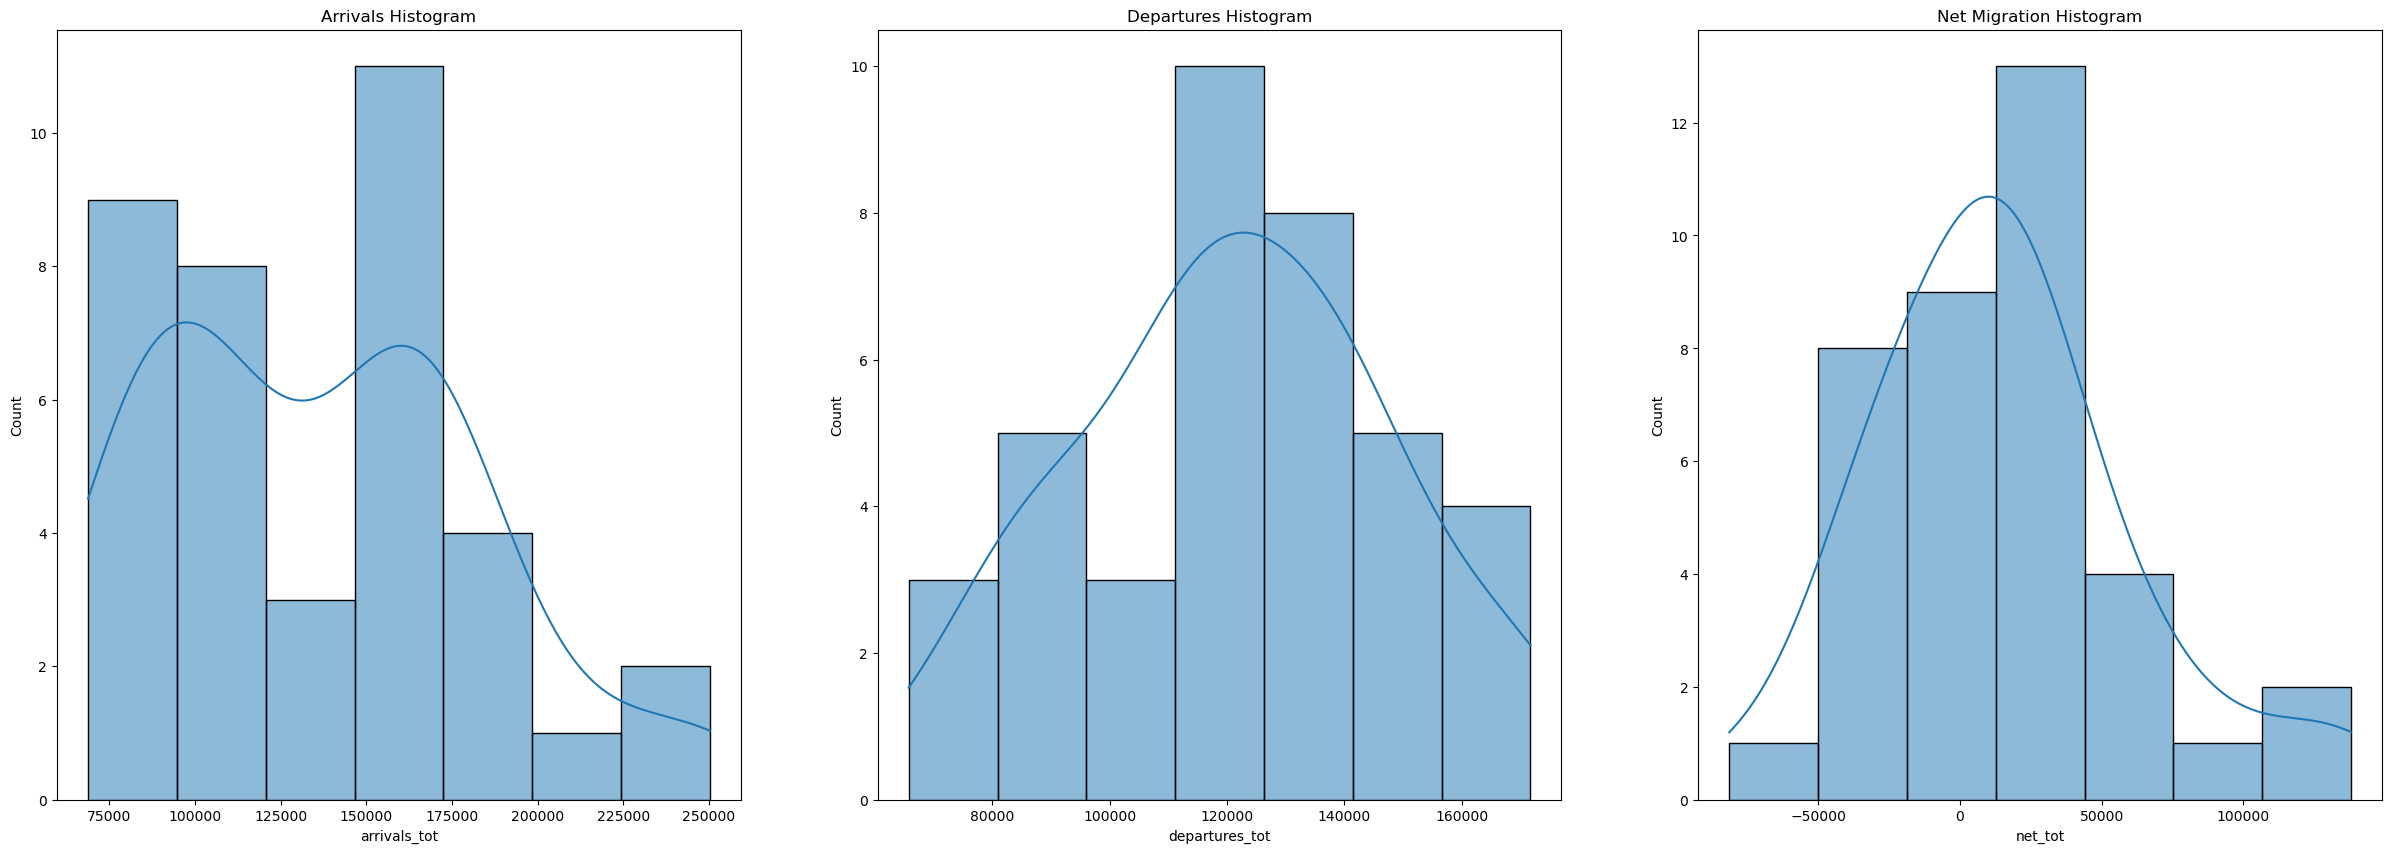

In [19]:
### Histograms of arrivals, departures, and net migration
# Make subplots
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize = (30,10))

# Arrivals
sns.histplot(data = yearly_migration_summary, x = 'arrivals_tot', kde = True, ax = ax0)
ax0.set_title("Arrivals Histogram")

# Departures
sns.histplot(data = yearly_migration_summary, x = 'departures_tot', kde = True, ax = ax1)
ax1.set_title("Departures Histogram")

# Net
sns.histplot(data = yearly_migration_summary, x = 'net_tot', kde = True, ax = ax2)
ax2.set_title("Net Migration Histogram")

# View
fig.show()

Looking at the charts above, the Arrivals histogram shows some bi-modality. There may be world events at play during the timeframes where those spikes in arrivals occurred, such as economic distress or civil unrest, causing an influx of immigrants. On the other hand, departures from New Zealand seem to be near normally distributed. Net Migration, which is determined from Arrivals and Departures also seems somewhat normally distributed. However, because it is impacted by the two other distributions, any extreme occurrences (like bimodality), would influence the shape of the distribution.

### Countries
There are a lot of countries each year serving as the point of departure for migrants into New Zealand. To make the analysis easier, I will group those countries according to regions. Example:
- Paraguay in a category 'South America'
- Croatia, Hungary, Greece in a category 'Europe'

However, this part of the exploration will start with some overall calculations across 1979 thru 2016.

In [20]:
### Create the list of countries
countries = [*new_data.Country.unique()]

In [21]:
# Function to sum the amount of arrivals/departures from/to a particular country regardless of year
def countryMovementSum(measure, country) -> int:
    """
        measure is either "Arrivals" or "Departure."
        country is one of the str values from countries list.
        Will return an int64
        
    """
    return int(new_data['Value'].loc[(new_data['Measure']==measure) & (new_data['Country']==country)].sum())

In [22]:
# Calculate arrival and departure sums per country regardless of year
arrivals_per_country = []
departures_per_country = []

# Arrivals
for c in countries:
    arrivals_per_country.append(countryMovementSum("Arrivals", c))
    departures_per_country.append(countryMovementSum("Departures", c))
    
# Create a dataframe of just this information
country_movement_df = pd.DataFrame(list(zip(countries, arrivals_per_country, departures_per_country)), columns = ["countries", "arrivals_tot", "departures_tot"])
# Remove Not stated and All countries
clean_movement_df = country_movement_df[0:251]

In [23]:
### Continents/Regions
# STEP 1: Add relevant geopandas data into clean_movement_df
# Read in the world data
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres')) # Low res earth file

# View
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In the current data set, some of the existing country names are actually continent names, such as Oceania. That's fine, there will simply be repetition between the Country and Region column. In summary, the columns take from world and added to the clean_movement_df will be:
- continent
- geometry

In [24]:
# STEP 2: Find the intersection between world.name and clean_movement_df
country_name_set = [i for j in clean_movement_df.countries for i in world.name if i == j]

# STEP 3: Build the continent column in clean_movement_df
continents = []

# Iterate
for c in clean_movement_df.countries:
    # Check whether the country name is in the country name set
    if c not in country_name_set:
        continents.append(c)
    # When c is in country name set, retrieve the continent name
    else:
        continents.append(world.continent.loc[world.name == c].values[0])
        
# Add to the dataframe
clean_movement_df['continent'] = continents

# Check
clean_movement_df.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,countries,arrivals_tot,departures_tot,continent
0,Oceania,750724,1314118,Oceania
1,Antarctica,134,119,Antarctica
2,American Samoa,1631,1249,American Samoa


In [25]:
# STEP 4: Return the list of continent values where continent == countries
continent_clean_up = [i for j in clean_movement_df.continent for i in clean_movement_df.countries if i == j]
continent_clean_set = set(continent_clean_up)

# Create the continent listing
world_continent_list = [*world.continent.unique()]

# Remove any items already in world_continent_list
for c in world_continent_list:
    # Check if the value in world_continent_list
    if c in continent_clean_set:
        # Remove that item
        continent_clean_set.remove(c)
    else:
        continue


# View
print(continent_clean_set)

{'Grenada', 'Macau', 'Swaziland', 'American Samoa', 'Tokelau', 'Equatorial Guinea', 'Solomon Islands', 'Dominica', 'San Marino', 'Comoros', 'Singapore', 'French Guiana', 'St Vincent and the Grenadines', 'St Kitts and Nevis', 'Mayotte', 'Andorra', 'Yugoslavia/Serbia and Montenegro', 'Dominican Republic', 'Democratic Republic of the Congo', 'Hong Kong', 'Martinique', 'Cook Islands', 'USA', 'French Southern Territories', 'Micronesia', 'St Lucia', 'Western Sahara', 'Nauru', 'Maldives', 'Montserrat', 'Reunion', 'British Virgin Islands', "Cote d'Ivoire", 'USSR', 'Falkland Islands', 'Brunei Darussalam', 'Bermuda', 'Mauritius', 'St Pierre and Miquelon', 'South Georgia and the South Sandwich Islands', 'Central African Republic', 'Palau', 'Norfolk Island', 'East Germany', 'UAE', 'Cayman Islands', 'St Maarten', 'Kiribati', 'French Polynesia', 'Northern Mariana Islands', 'Samoa', 'Seychelles', 'Antigua and Barbuda', 'Curacao', 'Cape Verde', 'US Minor Outlying Islands', 'Wallis and Futuna', 'Anguil

In [26]:
# Create the list of locations for each item in the set
# NOTE - this would be easier to do in a spreadsheet, but I like being tedious, so here we are.
continent_clean_updater = {'USSR':'Europe', 
                           'Macau':'Asia', 
                           'San Marino':'Europe', 
                           'Bermuda':'North America', 
                           'Guam':'Oceania', 
                           'Nauru':'Oceania', 
                           'Czechoslovakia':'Europe', 
                           'Equatorial Guinea':'Africa', 
                           'Solomon Islands':'Oceania',
                           'Western Sahara': 'Africa',
                           'South Georgia and the South Sandwich Islands': 'South America',
                           'Mauritius': 'Africa',
                           'St Lucia': 'North America',
                           'French Southern Territories': 'Antarctica',
                           'UK': 'Europe',
                           'St Helena': 'Africa',
                           'Norfolk Island': 'Oceania',
                           'Andorra': 'Europe',
                           'Bosnia and Herzegovina': 'Europe',
                           'Guadeloupe': 'North America',
                           'Bahrain': 'Asia',
                           'Wallis and Futuna': 'Oceania',
                           'Antigua and Barbuda': 'North America',
                           'Democrative Republic of the Congo': 'Africa',
                           'Liechtenstein': 'Europe',
                           'St Pierre and Miquelon': 'North America',
                           'Dominican Republic': 'North America',
                           'Micronesia': 'Oceania',
                           'Hong Kong': 'Asia',
                           'Cayman Islands': 'North America',
                           'Cape Verde': 'Africa',
                           'Pitcairn Island': 'Oceania',
                           'Cook Islands': 'Oceania',
                           'Turks and Caicos': 'North America',
                           'Niue': 'Oceania',
                           'Gibraltar': 'Europe',
                           'French Polynesia': 'Oceania',
                           'Christmas Island': 'Asia',
                           'Seychelles': 'Africa',
                           'Mayotte': 'Africa',
                           'Malta': 'Europe',
                           'Curacao': 'South America',
                           'US Virgin Islands':'North America',
                           'Dominica': 'North America',
                           'US Minor Outlying Islands': 'North America',
                           'Grenada': 'North America',
                           'Yugoslavia/Serbia and Montenegro': 'Europe',
                           'Cocos Islands': 'Asia',
                           'Brunei Darussalam': 'Asia',
                           'Reunion': 'Africa',
                           'Comoros': 'Africa',
                           'South Sudan': 'Africa',
                           'Central African Republic': 'Africa',
                           'Kiribati': 'Oceania',
                           'American Samoa': 'Oceania',
                           'Marshall Islands': 'Oceania',
                           'Palau': 'Oceania',
                           'Sao Tome and Principe': 'Africa',
                           'Vatican City': 'Europe',
                           'Falkland Islands': 'South America',
                           'Monaco': 'Europe',
                           'St Maarten': 'North America',
                           'Cote d\'Ivoire': 'Africa',
                           'British Virgin Islands': 'North America',
                           'Northern Mariana Islands': 'Oceania', 
                           'St Kitts and Nevis': 'North America', 
                           'Singapore': 'Asia',
                           'USA': 'North America', 
                           'British Indian Ocean Territory': 'Asia', 
                           'St Vincent and the Grenadines': 'North America', 
                           'Netherlands Antilles': 'South America', 
                           'Anguilla': 'North America', 
                           'Martinique': 'North America',
                           'French Guiana': 'South America', 
                           'Tokelau': 'Oceania', 
                           'Maldives': 'Asia', 
                           'Aruba': 'South America',
                           'Tonga': 'Oceania',
                           'Swaziland': 'Africa', 
                           'Barbados': 'North America', 
                           'Samoa': 'Oceania', 
                           'UAE': 'Asia',
                           'Faeroe Islands': 'Europe',
                           'Montserrat': 'North America', 
                           'East Germany': 'Europe', 
                           'South Yemen': 'Asia',
                           'Tuvalu': 'Oceania',
                           'Democratic Republic of the Congo': 'Africa'}

In [27]:
# For each country listed, tie to a continent
# If no matching value leave unchanged
for i in range(0, clean_movement_df.shape[0]):
    # If the country is in the dictionary
    if clean_movement_df.countries[i] in continent_clean_updater.keys():
        # Update the continent value
        clean_movement_df.continent[i] = continent_clean_updater[clean_movement_df.countries[i]]
    # Not in the dictionary
    else:
        # Do nothing
        continue

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [28]:
# Function to calculate measure sum 
def continentCounts(measure, continent) -> int:
    # If arrivals
    if measure.lower() == "arrivals":
        # Return
        return int(clean_movement_df['arrivals_tot'].loc[clean_movement_df['continent'] == continent].sum())
    elif measure.lower() == "departures":
        # Return
        return int(clean_movement_df['departures_tot'].loc[clean_movement_df['continent'] == continent].sum())
    elif measure.lower() == "net":
        # Return
        return int(clean_movement_df['arrivals_tot'].loc[clean_movement_df['continent'] == continent].sum()) - int(clean_movement_df['departures_tot'].loc[clean_movement_df['continent'] == continent].sum())
    else:
        print("Measure not found. Try entering arrivals, departures, or net.")

In [29]:
# Continents counts
arrivals_by_continent = []
departures_by_continent = []
net_by_continent = []

### Create the list of continents
continent_names = sorted([*clean_movement_df.continent.unique()])

for c in continent_names:
    arrivals_by_continent.append(continentCounts("arrivals", c))
    departures_by_continent.append(continentCounts("departures", c))
    net_by_continent.append(continentCounts("net", c))
    

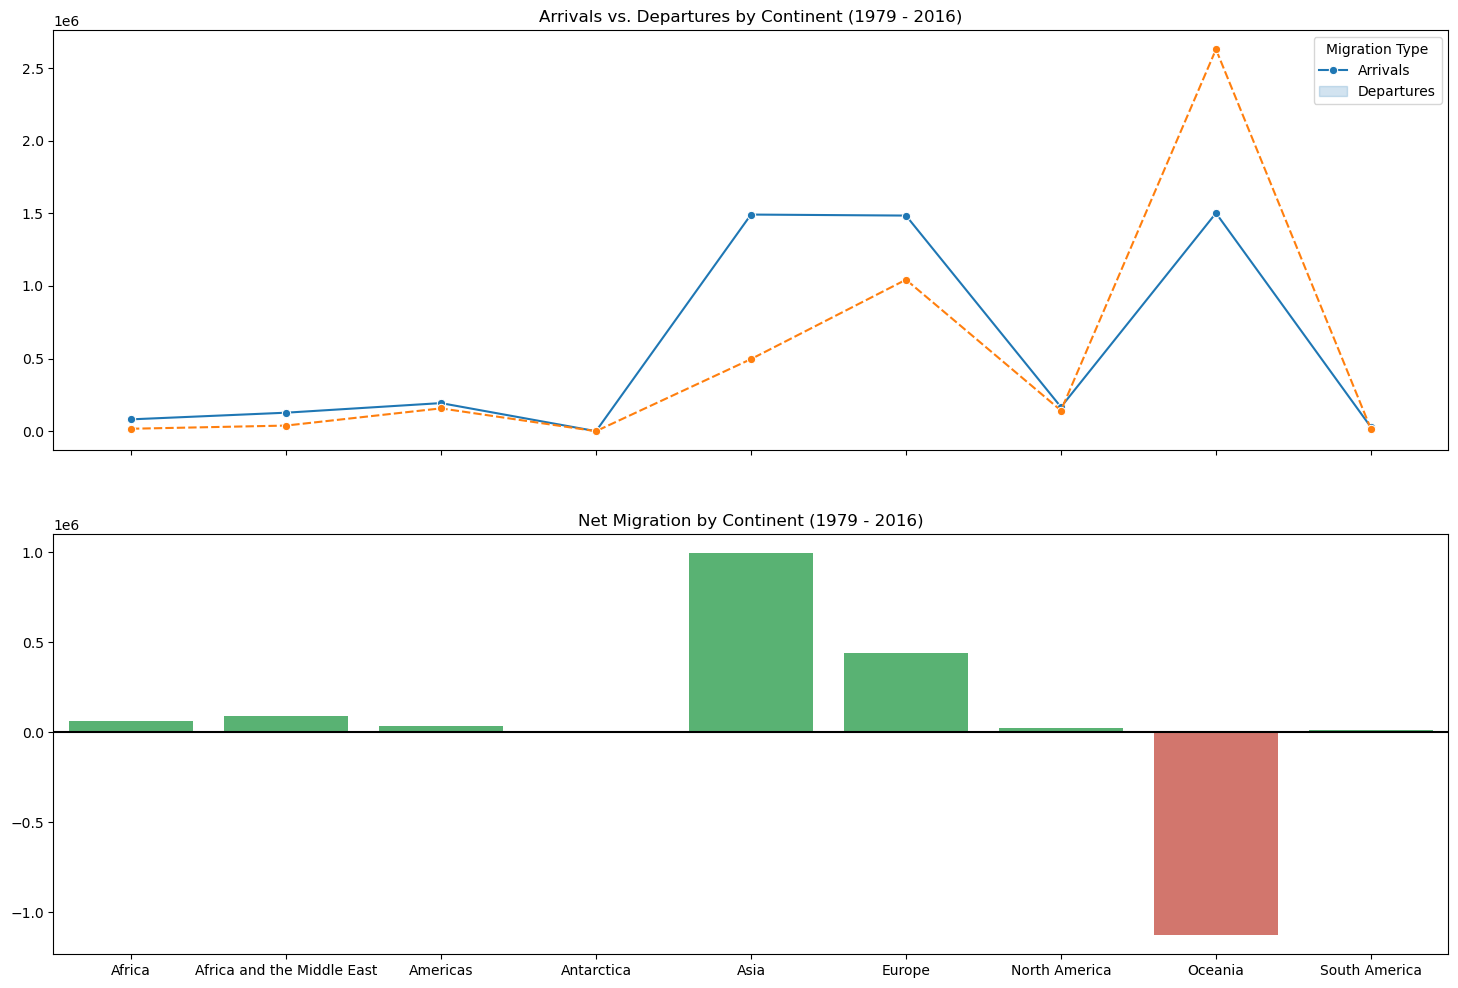

In [30]:
### Arrivals vs. Departures vs. Net by Continent
# Make subplots
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize = (18,12), sharex = True)

# Plots
sns.lineplot(data = [arrivals_by_continent, departures_by_continent],
             marker = "o",
             linestyle = 'dashed',
             ax = ax0)
# Set the line chart title
ax0.set_title('Arrivals vs. Departures by Continent (1979 - 2016)')
# Fix the legend
ax0.legend(title = "Migration Type", labels = ['Arrivals', 'Departures'])

# Centered barplot
sns.barplot(x=continent_names, y=net_by_continent, palette=[loss_colors[0] if y < 0 else loss_colors[1] for y in net_by_continent], ax=ax1)
# Center the axis
ax1.axhline(0, color = "black")
# Set the title for the barplot
ax1.set_title("Net Migration by Continent (1979 - 2016)")

# View
fig.show()

In [31]:
### Continents by Year
continents_by_year = []

# iterate through data.Country
for c in range(0,new_data.shape[0]):
    if new_data.Country[c] in continent_clean_updater.keys():
        continents_by_year.append(continent_clean_updater[new_data.Country[c]])
    elif new_data.Country[c] in country_name_set:
        continents_by_year.append(world.continent.loc[world.name == new_data.Country[c]].values[0])
    else:
        continents_by_year.append(new_data.Country[c])
        
# Add to the dataframe
new_data['Continent'] = continents_by_year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
# Function to sum the amount of arrivals/departures from/to a particular country regardless of year
def continentYearlySum(measure, continent, year) -> int:
    """
        measure is either "Arrivals" or "Departure."
        continent is one of the str values from continent list.
        Will return an int64
        
    """
    return int(new_data['Value'].loc[(new_data['Measure']==measure) & (new_data['Continent']==continent) & (new_data['Year']==y)].sum())

In [33]:
# Continent counts by year
arr_cont_yearly = {}
dep_cont_yearly = {}

# Iterate through continent names
for c in continent_names:
    # Set the continent as the key
    arr_count_list = []
    dep_count_list = []
    # Bulid the yearly list
    for y in years:
        # Arrivals
        arr_count_list.append(continentYearlySum("Arrivals", c, y))
        # Departures
        dep_count_list.append(continentYearlySum("Departures", c, y))
    # Append to the dictionary
    arr_cont_yearly[c] = arr_count_list
    #
    dep_cont_yearly[c] = dep_count_list
    

In [34]:
# Net
net_cont_yearly = {}

# Same set of keys
for c in continent_names:
    net_cont_yearly[c] = np.subtract(arr_cont_yearly[c], dep_cont_yearly[c])
    
# Check
net_cont_yearly.keys()

dict_keys(['Africa', 'Africa and the Middle East', 'Americas', 'Antarctica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])

In [35]:
# Add for 'Not stated' 
arr_not_stated = []
dep_not_stated = []

# Iterate
for y in years:
    arr_not_stated.append(continentYearlySum("Arrivals", "Not stated", y))
    dep_not_stated.append(continentYearlySum("Departures", "Not stated", y))
    
# Net
net_not_stated = [np.subtract(arr_not_stated, dep_not_stated)]
    
# Update dictionaries
arr_cont_yearly['Not stated'] = arr_not_stated
dep_cont_yearly['Not stated'] = dep_not_stated
net_cont_yearly['Not stated'] = net_not_stated

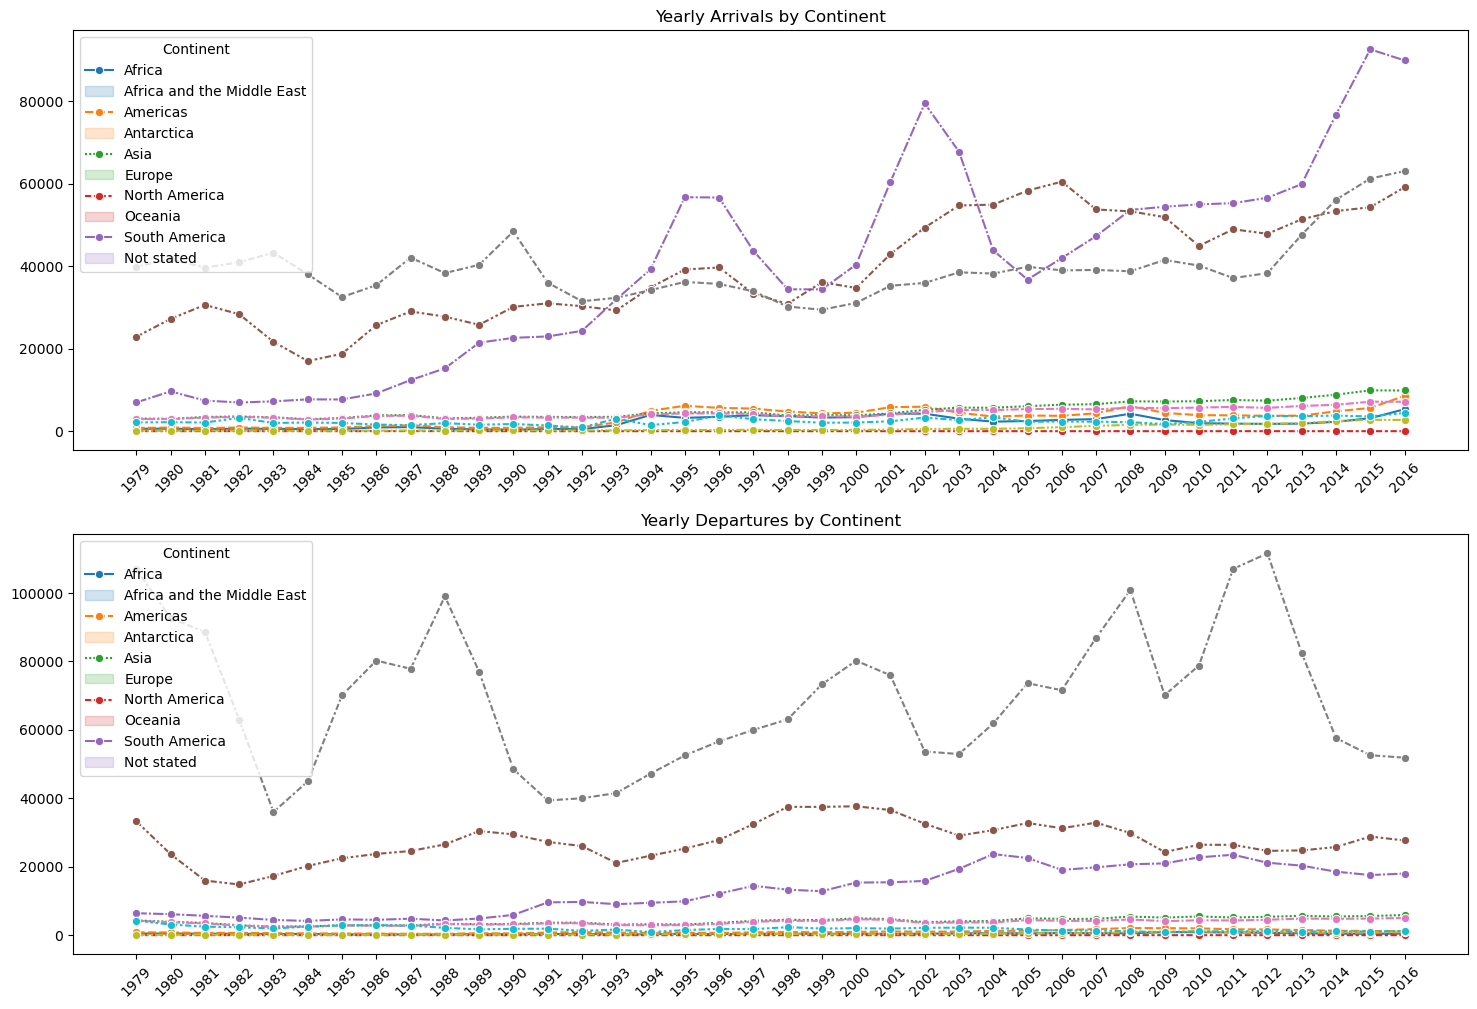

In [36]:
### Arrivals vs. Departures vs. Net by Continent
# Make subplots
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize = (18,12))

# Plots
sns.lineplot(data = [arr_cont_yearly['Africa'],
                     arr_cont_yearly['Africa and the Middle East'],
                     arr_cont_yearly['Americas'],
                     arr_cont_yearly['Antarctica'],
                     arr_cont_yearly['Asia'],
                     arr_cont_yearly['Europe'],
                     arr_cont_yearly['North America'],
                     arr_cont_yearly['Oceania'],
                     arr_cont_yearly['South America'],
                     arr_cont_yearly['Not stated']],
             marker = "o",
             linestyle = 'dashed',
             ax = ax0)
# Set the line chart title
ax0.set_title('Yearly Arrivals by Continent')
# Tick marks
ax0.set_xticks(range(len(years)))
ax0.set_xticklabels(years, rotation = 45)
# Fix the legend
ax0.legend(title = "Continent", labels = arr_cont_yearly.keys())


sns.lineplot(data = [dep_cont_yearly['Africa'],
                     dep_cont_yearly['Africa and the Middle East'],
                     dep_cont_yearly['Americas'],
                     dep_cont_yearly['Antarctica'],
                     dep_cont_yearly['Asia'],
                     dep_cont_yearly['Europe'],
                     dep_cont_yearly['North America'],
                     dep_cont_yearly['Oceania'],
                     dep_cont_yearly['South America'],
                     dep_cont_yearly['Not stated']],
             marker = "o",
             linestyle = "dashed",
             ax = ax1)
# Set the title
ax1.set_title('Yearly Departures by Continent')
# X tick labeles
ax1.set_xticks(range(len(years)))
ax1.set_xticklabels(years, rotation = 45)
# Fix the legend
ax1.legend(title = "Continent", labels = dep_cont_yearly.keys())

# View
fig.show()

## CUSUM Analysis - Arrivals and Departures

CUSUM analysis is a method of detecting notable changes in data. It would be interesting to see if year-over-year any noteworthy changes in arrivals to or departures from New Zealand occurred.
- Yearly arrivals, irrespective of country, are found in arrivals_per_year
- Yearly departures, irrespective of country, are found in departures_per_year

$X_{t}$ values, those we are using for change detection, are from the two lists above.

$\mu$ will be defined based on the average values of each list.

$\theta$ will act as the threshold.

$c$ will be the dampening constant to keep our judgments from getting too big or too small.

Note that this won't be very accurate to start, as I'm not accustomed to dealing with immigration data.

### Arrivals

In [37]:
### NOTE: X_t values are in arrivals_per_year
# Set mu to average of X_t
mu_arr = np.mean(arrivals_per_year)

# Threshold - usually 4 or 5 times the standard deviation
theta_arr = 5*np.std(arrivals_per_year)

# C - usually 1 standard deviation, or half a standard deviation
c_arr = np.std(arrivals_per_year)

# Display our starting values
print(f'Mu-arrivals: {mu_arr} | Threshold: {theta_arr} | C: {c_arr}')

Mu-arrivals: 135947.42105263157 | Threshold: 231120.4734168091 | C: 46224.09468336182


In [38]:
# Use a 0 start method
inc_arr_st_vals = [0]*len(arrivals_per_year)
dec_arr_st_vals = [0]*len(arrivals_per_year)

#Iterate through the arrivals values
for a in range(1,len(arrivals_per_year)):
    inc_arr_st_vals[a] = max(0, inc_arr_st_vals[a-1] + (arrivals_per_year[a] - mu_arr - c_arr))
    dec_arr_st_vals[a] = max(0, dec_arr_st_vals[a-1] + (mu_arr - arrivals_per_year[a] - c_arr))


In [39]:
# Build a dataframe
arr_yearly_cusum = pd.DataFrame(list(zip(years, inc_arr_st_vals, dec_arr_st_vals)), columns=['year', 'increase_detection', 'decrease_detection'])

# Classify as increase, decrease, or no change
arr_chg_type = []

# Iterate
for a in range(0, len(arr_yearly_cusum.year)):
    # Increase
    if arr_yearly_cusum.increase_detection[a] > arr_yearly_cusum.decrease_detection[a]:
        arr_chg_type.append("increase")
    # Decrease
    elif arr_yearly_cusum.decrease_detection[a] > arr_yearly_cusum.increase_detection[a]:
        arr_chg_type.append("decrease")
    # No change
    else:
        arr_chg_type.append("no change")
        
# Add to dataframe
arr_yearly_cusum['change_type'] = arr_chg_type

In [40]:
# Display the change type per year
# Table
print(tbl.tabulate(arr_yearly_cusum[['year', 'change_type']],
                    headers=["Years", "Change Type"],
                    tablefmt="prettytable"))

      Years  Change Type
--  -------  -------------
 0     1979  no change
 1     1980  decrease
 2     1981  decrease
 3     1982  decrease
 4     1983  decrease
 5     1984  decrease
 6     1985  decrease
 7     1986  decrease
 8     1987  decrease
 9     1988  decrease
10     1989  decrease
11     1990  decrease
12     1991  decrease
13     1992  decrease
14     1993  no change
15     1994  no change
16     1995  no change
17     1996  no change
18     1997  no change
19     1998  no change
20     1999  no change
21     2000  no change
22     2001  no change
23     2002  increase
24     2003  increase
25     2004  no change
26     2005  no change
27     2006  no change
28     2007  no change
29     2008  no change
30     2009  no change
31     2010  no change
32     2011  no change
33     2012  no change
34     2013  increase
35     2014  increase
36     2015  increase
37     2016  increase


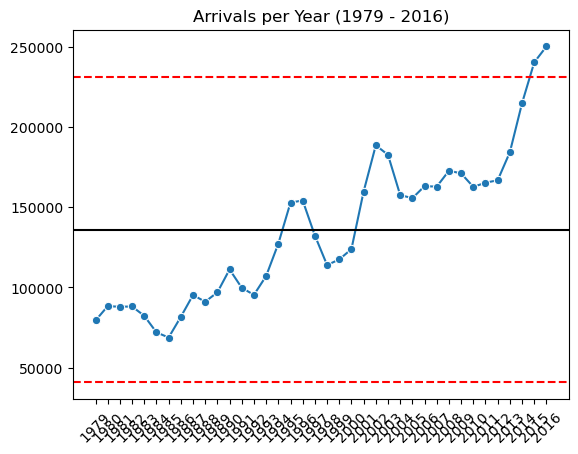

<Figure size 1800x1200 with 0 Axes>

In [41]:
# Arrivals only chart
arr_cusum = sns.lineplot(data = [arrivals_per_year],
                         marker = "o",
                         linestyle = 'solid',
                         legend = False)
# Tickmarks
arr_cusum.set_xticks(range(len(years)))
arr_cusum.set_xticklabels(years, rotation = 45)

# Title
arr_cusum.set_title("Arrivals per Year (1979 - 2016)")

# Add mu_arr line
plt.axhline(mu_arr, c = 'black', ls = '-')

# Add threshold lines
plt.axhline(theta_arr, c = 'red', ls = '--')
plt.axhline(mu_arr - (theta_arr-mu_arr), c = 'red', ls = '--')

# Display
plt.figure(figsize=(18, 12))
plt.show()

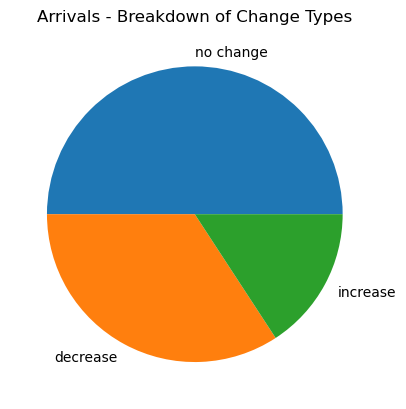

In [42]:
# Counter
arr_chg_type_counter = Counter(arr_yearly_cusum.change_type)

# Breakdown of change types
plt.pie(arr_chg_type_counter.values(), labels = arr_chg_type_counter.keys())

# Title
plt.title("Arrivals - Breakdown of Change Types")
  
# displaying chart
plt.show()

### Departures

In [43]:
### NOTE: X_t values are in departures_per_year
# Set mu to average of X_t
mu_dep = np.mean(departures_per_year)

# Threshold - usually 4 or 5 times the standard deviation
theta_dep = 5*np.std(departures_per_year)

# C - usually 1 standard deviation, or half a standard deviation
c_dep = np.std(departures_per_year)

# Display our starting values
print(f'Mu: {mu_dep} | Threshold: {theta_dep} | C: {c_dep}')

Mu: 121268.55263157895 | Threshold: 131312.90639205315 | C: 26262.581278410627


In [44]:
# Use a 0 start method
inc_dep_st_vals = [0]*len(departures_per_year)
dec_dep_st_vals = [0]*len(departures_per_year)

#Iterate through the arrivals values
for a in range(1,len(departures_per_year)):
    inc_dep_st_vals[a] = max(0, inc_dep_st_vals[a-1] + (departures_per_year[a] - mu_dep - c_dep))
    dec_dep_st_vals[a] = max(0, dec_dep_st_vals[a-1] + (mu_dep - departures_per_year[a] - c_dep))

In [45]:
# Build a dataframe
dep_yearly_cusum = pd.DataFrame(list(zip(years, inc_dep_st_vals, dec_dep_st_vals)), columns=['year', 'increase_detection', 'decrease_detection'])

# Classify as increase, decrease, or no change
dep_chg_type = []

# Iterate
for a in range(0, len(dep_yearly_cusum.year)):
    # Increase
    if dep_yearly_cusum.increase_detection[a] > dep_yearly_cusum.decrease_detection[a]:
        dep_chg_type.append("increase")
    # Decrease
    elif dep_yearly_cusum.decrease_detection[a] > dep_yearly_cusum.increase_detection[a]:
        dep_chg_type.append("decrease")
    # No change
    else:
        dep_chg_type.append("no change")
        
# Add to dataframe
dep_yearly_cusum['change_type'] = dep_chg_type

In [46]:
# Display the change type per year
# Table
print(tbl.tabulate(dep_yearly_cusum[['year', 'change_type']],
                    headers=["Years", "Change Type"],
                    tablefmt="prettytable"))

      Years  Change Type
--  -------  -------------
 0     1979  no change
 1     1980  no change
 2     1981  no change
 3     1982  decrease
 4     1983  decrease
 5     1984  decrease
 6     1985  decrease
 7     1986  decrease
 8     1987  no change
 9     1988  no change
10     1989  no change
11     1990  decrease
12     1991  decrease
13     1992  decrease
14     1993  decrease
15     1994  decrease
16     1995  decrease
17     1996  decrease
18     1997  decrease
19     1998  no change
20     1999  no change
21     2000  no change
22     2001  no change
23     2002  no change
24     2003  no change
25     2004  no change
26     2005  no change
27     2006  no change
28     2007  increase
29     2008  increase
30     2009  increase
31     2010  increase
32     2011  increase
33     2012  increase
34     2013  increase
35     2014  increase
36     2015  no change
37     2016  no change


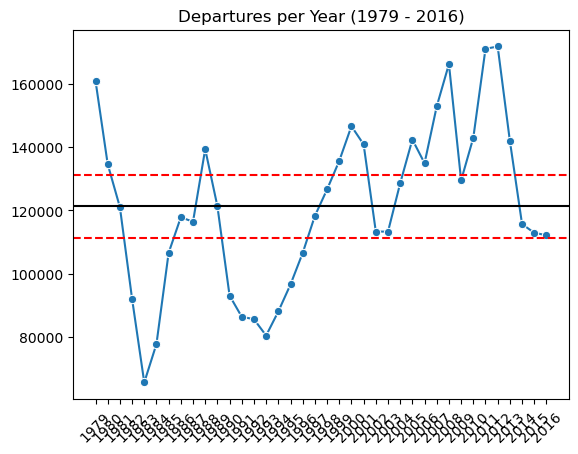

<Figure size 1800x1200 with 0 Axes>

In [47]:
# Departures only chart
dep_cusum = sns.lineplot(data = [departures_per_year],
                         marker = "o",
                         linestyle = 'solid',
                         legend = False)
# Tickmarks
dep_cusum.set_xticks(range(len(years)))
dep_cusum.set_xticklabels(years, rotation = 45)

# Title
dep_cusum.set_title("Departures per Year (1979 - 2016)")

# Add mu_arr line
plt.axhline(mu_dep, c = 'black', ls = '-')

# Add threshold lines
plt.axhline(theta_dep, c = 'red', ls = '--')
plt.axhline(mu_dep - (theta_dep-mu_dep), c = 'red', ls = '--')

# Display
plt.figure(figsize=(18, 12))
plt.show()

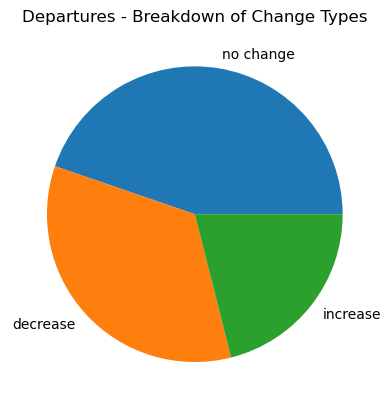

In [48]:
# Counter
dep_chg_type_counter = Counter(dep_yearly_cusum.change_type)

# Breakdown of change types
plt.pie(dep_chg_type_counter.values(), labels = dep_chg_type_counter.keys())

# Title
plt.title("Departures - Breakdown of Change Types")
  
# displaying chart
plt.show()